In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Bussiness problem - tv sales vs the total expenditure of the data 

In [3]:
df = pd.read_csv("C:\\Users\\Sricharan Reddy\\Downloads\\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [5]:
df['total_expens'] = df['TV']+df['radio']+df['newspaper']

In [6]:
df.head()

,TV,radio,newspaper,sales,total_expens
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [7]:
df.drop(columns=['TV','radio','newspaper'],inplace = True)

In [8]:
df.head()

,sales,total_expens
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


In [9]:
#now lets see if there is a linear relationship by plotting the both 

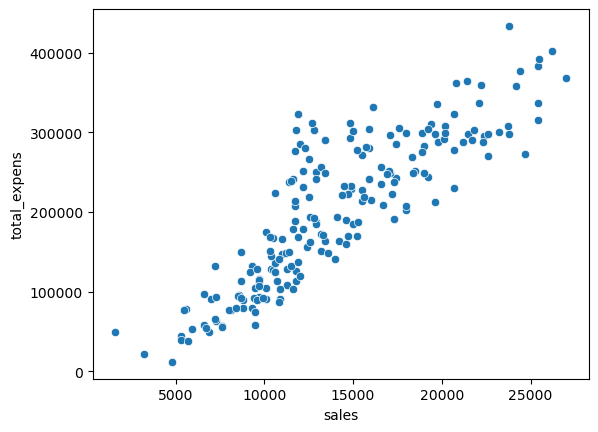

In [11]:
sns.scatterplot(x='sales',y='total_expens',data=df)
plt.show()

In [12]:
#there a linear relation so lets try by applying the linear regression

In [14]:
df.isnull().sum()

sales           0
total_expens    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [ ]:
#there are no duplicates and null values in this data set

In [16]:
x = df[['sales']]

In [17]:
y = df['total_expens']

In [13]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.intercept_

-13069.389477174118

In [24]:
model.coef_

array([15.26126272])

In [25]:
y_pred_test = model.predict(x_test)

In [28]:
model.score(x_test,y_test)

0.7493164059929149

In [29]:
#the r2 score (coeeficient of determination is  - 0.7493164059929149)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
print("root mean squared error is ",np.sqrt(mean_squared_error(y_test,y_pred_test)))

root mean squared error is  46982.40153148506


In [32]:
model.score(x_train,y_train)

0.751955367544253

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
print(cross_val_score(model,x,y,cv=5).mean())

0.7474640514827872


In [35]:
#cross validation score is 0.7474640514827872 which is almost equal to the test accuracy so there is no problem

In [36]:
#our basic model of simple linear regression is ready 